# <center>Rotation in a Skewed Plate with One End Fixed</center>
## <center><b>(Advanced Mechanics of Solids)</b></center>
## <center><b>(Term Project, Part-1)</b></center>
### <center><b>Submission by: Group No. 11</b></center>

<b>Team Members:-</b>
<br>Dewang Suresh Gandhi (20ME63R27)</br>
<br>Saksham Kumar (20ME63R44)</br>
<br>Shivanshu Zamdagni (20ME63S01)</br>
<br>Hima Vamsi Krishna Anala (16ME33009)</br>


### Problem Introduction

In this term project, we are solving the problem of a skewed plate fixed at one side (root chord) and we wish to find the rotation of the tip chord relative to the root chord.

This skewed plate may be used to represent the swept wing of a high-speed aircraft and therefore can have many practical applications, for example in Aerospace Industries.




The situation is represented in the below figure. There is a parabolic line load with a maximum value of $\Gamma_0$ at the tip chord while the root chord is clamped.

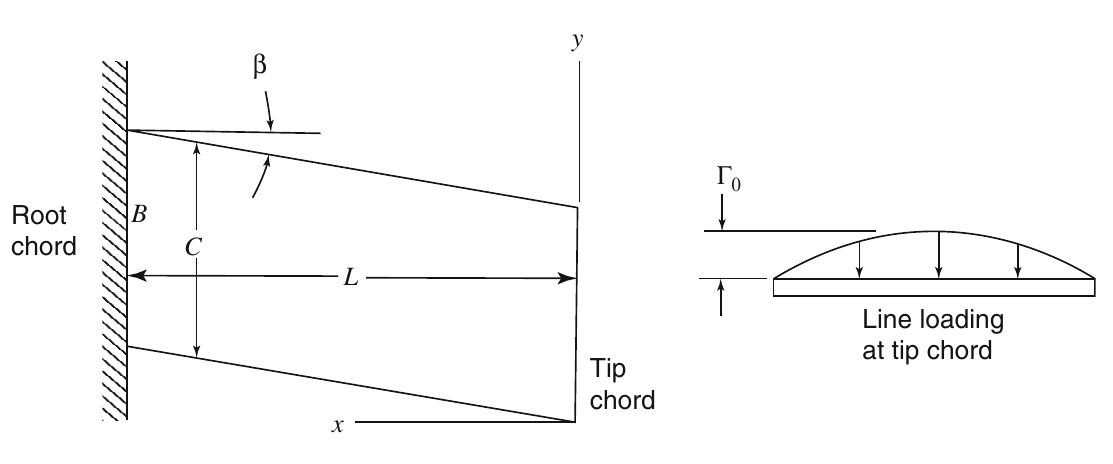

### Formulation of the Problem
Now that we have understood our problem, lets start formulating it.

<br><br><b>Location of Different Parts of the Problem</b>
<br><br>1. Introduction of Symbols of different parameters: In[1]
<br>2. Formulation of the expression for the deflection, $w$: In[2]
<br>3. Formulation of the expression for Total Potential Energy: In[4] to In[10]
<br>4. Final Expression of the Total Potential Energy: In[11]
<br>5. Extremisation of Total Potential Energy to obtain A and B: In[12]
<br>6. Final expression for the rotation at tip chord: In[14] to In[15]
<br>7. Calculation of the Rotation of the Tip using Analytical method: In[21]
<br>8. Calculation of the Rotation of the Tip using Numerical method: In[22]


We will first import some important libraries in jupyter notebook which will help us in solving our problem.

In [1]:
import sympy as sp
import numpy as np
from IPython.display import Math, Latex
from sympy.integrals.deltafunctions import deltaintegrate
from sympy import DiracDelta

We have introduced symbols for different parameters.

Here,
	<br>$\;\;\;\;\;\;$L is the span length of the skewed plate.</br>
	<br>$\;\;\;\;\;\;$C is the chord length.</br>
	<br>$\;\;\;\;\;\;$D is the bending rigidity, i.e., $D = \frac{Eh^3}{12(1 - \nu^2)}$.</br>
	<br>$\;\;\;\;\;\;$$\zeta$ is the normalized dimensionless x-coordinate, i.e., $\zeta = \frac{x}{L}$.</br>
	<br>$\;\;\;\;\;\;$$\eta$ is the normalized dimensionless y-coordinate, i.e., $\eta = \frac{y}{C}$.</br>
	<br>$\;\;\;\;\;\;$$\beta$ is the angle made by the skewed plate with the x-axis as shown in the figure.</br>
	<br>$\;\;\;\;\;\;$$\nu$ is the Poisson's ratio.</br>


In [2]:
L, C, D, zeta, eta, beta, nu = sp.symbols('L, C, D, zeta, eta, beta, nu') 


#display(L, C, D, zeta, eta, beta, nu)

We know from our earlier knowledge that the deflection curve for a simple straight cantilever beam is: $$w' = \frac{PL^3}{6EI} [2 - 3(\frac{x}{L}) + (\frac{x}{L})^3]$$

In our model, we propose to use the bracketed expression in the above equation to account for the variation in the x-direction and assume that the variation in the y-direction is linear.

Also, instead of x and y, we use dimensionless coordinate variables - $\zeta$ and $\eta$ such that $\zeta = \frac{x}{L}$ and $\eta = \frac{y}{L}$. Our deflection expression can then be written as follows: $$w = (A + B\eta)(2 - 3\zeta + \zeta^3)$$

In [3]:
A, B = sp.symbols('A, B')
w = sp.Function('w')(eta, zeta)
lhs1 = w
rhs1 = (A + B*eta)*(2- 3*zeta + zeta**3)
eq1 = sp.Eq(lhs1, rhs1)
w = (A + B*eta)*(2- 3*zeta + zeta**3)

display(eq1)

Eq(w(eta, zeta), (A + B*eta)*(zeta**3 - 3*zeta + 2))

Now that we have the expression of displacement $w$, we express the strain energy in terms of the dimensionless variables.

<br><b>Defining Total Potential Energy in Cartesian Co-ordinates :</b> 
<br><br> 
$
\begin{aligned}
\pi = \dfrac{D}{2}\int\int_R\{(\nabla^2 w)^2 + 2(1-\nu)[(\dfrac{\partial^2 w}{\partial x \partial y})^2 - (\dfrac{\partial^2 w}{\partial x^2})(\dfrac{\partial^2 w}{\partial y^2})]\}\; {\rm d}x {\rm d}y  - \int\int_{R}\; qw\;{\rm d}x {\rm d}y 
\end{aligned}
$
<br> $\quad$ where $ D = \dfrac{Eh^3}{12(1-\nu)}$
<br><br>
<b> Now we will convert $x$ and $y$ co-ordinates into their dimensionless form i.e. replace</b>
<br> 1. $\;\; \zeta \rightarrow \dfrac{x}{L} \quad L$ is the Lenth of the Skewed Plate 
<br> 2. $\;\; \eta \rightarrow \dfrac{y}{C}  \quad C$ is the Root Chord of the skewed Plate 

<br><br> <b>  Using Basic Differential Calculus we can write the Strain Energy using  dimensioneless co-ordinates:-</b>
<br> 1. $\;\; dx \rightarrow Ld\zeta $
<br> 2. $\;\; dy \rightarrow Cd\eta $
<br> 3. $\;\; \dfrac{ \partial^2}{\partial x^2} \rightarrow \dfrac{\partial^2}{L^2 \partial \zeta^2} $
<br> 4. $\;\; \dfrac{\partial^2}{\partial y^2} \rightarrow \dfrac{\partial^2}{C^2 \partial \eta^2} $
<br> 5. $\;\; \dfrac{\partial^2}{\partial x \partial y} \rightarrow \dfrac{\partial^2}{CL \partial \zeta \partial \eta}$

<br><br><b> Using the above rules we write Total Potential Energy in form of dimensionless variables $\zeta$ and $\eta$ as :</b>
<br><br> 
$ 
\begin{aligned}
\pi = \dfrac{LCD}{2} \int_{0}^{1}{\rm d}\zeta\;\int_{\frac{L\zeta\tan(\beta)}{C}}^{1+\frac{L\zeta\tan(\beta)}{C}}\{[\dfrac{1}{L^2}\dfrac{\partial^2 w}{\partial \zeta^2}+\dfrac{1}{C^2}\dfrac{\partial^2 w}{\partial \eta^2}]^2 + \dfrac{2(1-\nu)}{L^2C^2}[(\dfrac{\partial^2 w}{\partial \zeta \partial \eta})^2 - (\dfrac{\partial^2 w}{\partial \zeta^2})(\dfrac{\partial^2 w}{\partial \eta^2})]\}\;{\rm d}\eta \newline +\; 4\gamma L\int_{0}^{1}{\rm d}\zeta\;\int_{\frac{L\zeta\tan(\beta)}{C}}^{1+\frac{L\zeta\tan(\beta)}{C}}(\eta^2 - \eta)w_{(\eta , \zeta)}\delta_{(\zeta-0)}\;{\rm d}\eta 
\end{aligned}
$ 
<br><br> Now we shall split this big expression of the Total Potential Energy into <b> TWO </b> Expressions:
<br><br> 
$
\begin{aligned}Expr_1 = \frac{LCD}{2} \int_{0}^{1}{\rm d}\zeta\;\int_{\frac{L\zeta\tan(\beta)}{C}}^{1+\frac{L\zeta\tan(\beta)}{C}}\{[\frac{1}{L^2}\frac{\partial^2 w}{\partial \zeta^2}+\frac{1}{C^2}\frac{\partial^2 w}{\partial \eta^2}]^2 + \frac{2(1-\nu)}{L^2C^2}[(\frac{\partial^2 w}{\partial \zeta \partial \eta})^2 - (\frac{\partial^2 w}{\partial \zeta^2})(\frac{\partial^2 w}{\partial \eta^2})]\}\;{\rm d}\eta 
\end{aligned}
$
<br><br> 
$
\begin{aligned}Expr_2 = 4\gamma L\int_{0}^{1}{\rm d}\zeta\;\int_{\frac{L\zeta\tan(\beta)}{C}}^{1+\frac{L\zeta\tan(\beta)}{C}}(\eta^2 - \eta)w_{(\eta , \zeta)}\delta_{(\zeta-0)}\;{\rm d}\eta 
\end{aligned}
$ 

<br><b>Few points to note from the above expression:</b>
<br> 1. From the geometry of the plate its clear that $\zeta$ varies from 0 to 1 and $\eta$ varies from ${\dfrac{L\zeta\tan(\beta)}{C}} to\; {1+\dfrac{L\zeta\tan(\beta)}{C}}$
<br> 2. The $Expr_1$ is contributed by the <b>Strain Energy</b>
<br> 3. Here in the above expression $Expr_2$ is contributed by an <b>distributed load </b>$ \;q = -4\gamma (\eta^2-\eta)\delta_{(\zeta-0)}$ acting at $x=0$ or $\zeta = 0$



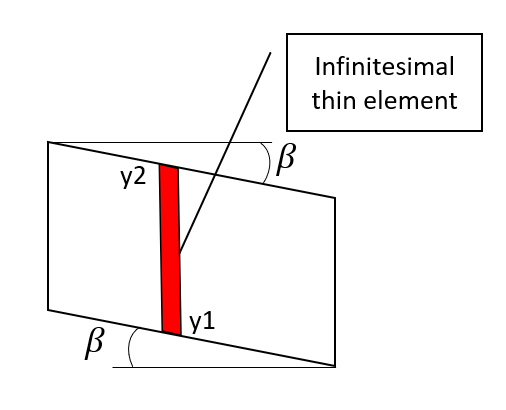

So, we will do integration for this thin element from $y_1$ to $y_2$. In normalized coordinate system, $\zeta (=y/C)$ will go from 0 to 1. Lets evaluate the lower limit and upper limit for this integration which are $y_1$ and $y_2$ respectively in x-y coordinate system and $\eta_1$ and $\eta_2$ in normalized coordinate systems.

<br>$y_1 = x tan(\beta)$</br>
<br>i.e., $y_1 = L\zeta tan(\beta)$</be>
<br>i.e., $C\eta_1 = L\zeta tan(\beta)$</br>
<br>i.e., $\eta_1 = \frac{L}{C} \zeta tan(\beta)$</br>

<br>and, $\eta_2 = 1 + \eta_1$</br>
<br>$i.e., \eta_2 = 1 + \frac{L}{C} \zeta tan(beta)$</br>




<br><br><b> Using the above rules we write Total Potential Energy in form of dimensionless variables $\zeta$ and $\eta$ as :</b>
<br><br> 
$ 
\begin{aligned}
\pi = \dfrac{LCD}{2} \int_{0}^{1}{\rm d}\zeta\;\int_{\frac{L\zeta\tan(\beta)}{C}}^{1+\frac{L\zeta\tan(\beta)}{C}}\{[\dfrac{1}{L^2}\dfrac{\partial^2 w}{\partial \zeta^2}+\dfrac{1}{C^2}\dfrac{\partial^2 w}{\partial \eta^2}]^2 + \dfrac{2(1-\nu)}{L^2C^2}[(\dfrac{\partial^2 w}{\partial \zeta \partial \eta})^2 - (\dfrac{\partial^2 w}{\partial \zeta^2})(\dfrac{\partial^2 w}{\partial \eta^2})]\}\;{\rm d}\eta \newline +\; 4\gamma L\int_{0}^{1}{\rm d}\zeta\;\int_{\frac{L\zeta\tan(\beta)}{C}}^{1+\frac{L\zeta\tan(\beta)}{C}}(\eta^2 - \eta)w_{(\eta , \zeta)}\delta_{(\zeta-0)}\;{\rm d}\eta 
\end{aligned}
$ 
<br><br> Now we shall split this Big Expression of Total Potential Energy into <b> TWO </b> expressions:-
<br><br> 
$
\begin{aligned}Expr_1 = \frac{LCD}{2} \int_{0}^{1}{\rm d}\zeta\;\int_{\frac{L\zeta\tan(\beta)}{C}}^{1+\frac{L\zeta\tan(\beta)}{C}}\{[\frac{1}{L^2}\frac{\partial^2 w}{\partial \zeta^2}+\frac{1}{C^2}\frac{\partial^2 w}{\partial \eta^2}]^2 + \frac{2(1-\nu)}{L^2C^2}[(\frac{\partial^2 w}{\partial \zeta \partial \eta})^2 - (\frac{\partial^2 w}{\partial \zeta^2})(\frac{\partial^2 w}{\partial \eta^2})]\}\;{\rm d}\eta 
\end{aligned}
$
<br><br> 
$
\begin{aligned}Expr_2 = 4\Gamma_0 L\int_{0}^{1}{\rm d}\zeta\;\int_{\frac{L\zeta\tan(\beta)}{C}}^{1+\frac{L\zeta\tan(\beta)}{C}}(\eta^2 - \eta)w_{(\eta , \zeta)}\delta_{(\zeta-0)}\;{\rm d}\eta 
\end{aligned}
$ 

<br><b>Few points to note from the above expression:</b>
<br> 1. From the geometry of the plate its clear that $\zeta$ varies from 0 to 1 and $\eta$ varies from ${\dfrac{L\zeta\tan(\beta)}{C}} to\; {1+\dfrac{L\zeta\tan(\beta)}{C}}$
<br> 2. The $Expr_1$ is contributed by the <b>Strain Energy</b>
<br> 3. Here in the above expression $Expr_2$ is contributed by a <b>distributed load </b>$ \;q = -4\gamma (\eta^2-\eta)\delta_{(\zeta-0)}$ acting at $x=0$ or $\zeta = 0$



Now, we will further split the $Expr_1$ of the Strain Energy into <b>TWO</b> terms for ease of representation:
<br> <br>
$
\begin{aligned}
Term_1 =  [\frac{1}{L^2}\frac{\partial^2 w}{\partial \zeta^2}+\frac{1}{C^2}\frac{\partial^2 w}{\partial \eta^2}]^2
\end{aligned}
$
<br>
$
\begin{aligned}
Term_2 = \frac{2(1-\nu)}{L^2C^2}[(\frac{\partial^2 w}{\partial \zeta \partial \eta})^2 - (\frac{\partial^2 w}{\partial \zeta^2})(\frac{\partial^2 w}{\partial \eta^2})]\}\;{\rm d}\eta 
\end{aligned}
$
<br><br>
Now, we will substitute $\;w = (A + B\eta)(2 - 3\zeta + \zeta^3)$ into $Term_1$ and $Term_2$ 

In [4]:
# We have written term 1 and term 2 which we'll use later for writing the complete expression for the strain energy.
term1= ((1/L**2)*sp.diff(w,zeta,2) + (1/C**2)*sp.diff(w,eta,2))**2
term2= (2*(1-nu)/(L*C)**2)*((sp.diff(w,zeta,eta))**2 - sp.diff(w,zeta,2)*sp.diff(w,eta,2))
# Lower limit of integration
LL= L*zeta* sp.tan(beta)/C
# Upper limit of integration
UL= 1 + LL
display(Math(r'Term_1 = {}'.format(sp.latex(term1))))
display(Math(r'Term_2 = {}'.format(sp.latex(term2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now, we will integrate $Term_1 + Term_2$ wrt $\eta$ first

In [5]:
# Integrand 1
I1 = sp.integrate(term1+term2,(eta,(LL,UL))).simplify()
display(Math(r'I_1 = {}'.format(sp.latex(I1))))

<IPython.core.display.Math object>

Now, we will obtain the expression of the strain energy, $U$ i.e $Expr_1$ by integrating $I_1$ wrt $\zeta.\;$This will be later used to write the expression of the total potential energy.

In [6]:
Expr1, Expr2 = sp.symbols('Expr_1, Expr_2')
Expr1 = (L*C*D/2)*(sp.integrate(I1,(zeta,(0,1))).expand().simplify())
display(Math(r'Expr_1 = {}'.format(sp.latex(Expr1))))

<IPython.core.display.Math object>

In [7]:
gamma = sp.symbols('Gamma_0')
#Gamma is the peak value of the parabolic line force (N/m)

Now let us calculate the $Expr_2$, for ease of representation we define the integrand as: <br><br>
$
\begin{aligned}
Term_3 = (\eta^2 - \eta)w_{(\eta , \zeta)}\delta_{(\zeta-0)}
\end{aligned}
$

In [8]:
term3 = (eta**2 - eta)* DiracDelta(zeta - 0)*w
display(Math(r'Term_3 = {}'.format(sp.latex(term3))))

<IPython.core.display.Math object>

In [9]:
#Integrand 2
I2 = (4*L*gamma)*deltaintegrate(term3,(eta,(LL,UL))).simplify()        # integrating term3 wrt eta
display(Math(r'I_2 = {}'.format(sp.latex(I2))))
Expr2 = deltaintegrate(I2,zeta).simplify()           # integrating I2 wrt to zeta
display(Math(r'Expr_2 = {}'.format(sp.latex(Expr2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The above expression $II2 = -\dfrac{2\Gamma_0 L(2A+B) \theta_{(\zeta-0)}}{3} \quad,$ where $\theta_{(\zeta-0)}$ is the heavy side function <br><br>
$
\begin{align}
\theta(\zeta-0) = \left\{ \begin{array}{cc} 
                0 & \hspace{5mm} \theta<=0 \\
                1 & \hspace{5mm} \theta>0 \\
                  \end{array} \right.
\end{align}
$
<br>
So, after substituting the limits $Expr_2 = -\dfrac{2\Gamma_0 L(2A+B) \theta_{(\zeta-0)}}{3}\mid_(\zeta = 1) \;+\dfrac{2\Gamma_0 L(2A+B) \theta_{(\zeta-0)}}{3}\mid_(\zeta = 0) $
<br><br>Which subsequently reduces to $Expr_2 = -\dfrac{2\Gamma_0 L(2A+B)}{3}$

In [10]:
Expr2 = deltaintegrate(I2,(zeta,(-0.00001,1))).simplify()    #taking Lower limit a bit less than 0 as Heavy side function 
display(Math(r'Expr_2 = {}'.format(sp.latex(Expr2))))                                            #is not defined at exact 0

<IPython.core.display.Math object>

Now that we have evaluated individual $Expr_1$,$Expr_2$, lets write the expression for $\large Total Potential Energy\;,$ $\Pi = Expr_1+Expr_2$

In [11]:
pi = sp.symbols('Pi')

lhs = pi
rhs = Expr1 + Expr2
eq = sp.Eq(lhs, rhs)
display(eq)

pi = (Expr1 + Expr2)

Eq(Pi, -2*Gamma_0*L*(2*A + B)/3 + D*(12*B**2*L**2*(-4*nu + 3*tan(beta)**2 + 4) + 45*B*C*L*(2*A + B)*tan(beta) + 20*C**2*(3*A**2 + 3*A*B + B**2))/(10*C*L**3))

By extremizing $ \Large \pi$ with respect to A and B we obtain a pair of algebraic equations which when solved yield

In [12]:
Ex_1 = sp.Eq(sp.diff(pi,A),0)
Ex_2 = sp.Eq(sp.diff(pi,B),0)
display(Ex_1, Ex_2)

Eq(-4*Gamma_0*L/3 + D*(90*B*C*L*tan(beta) + 20*C**2*(6*A + 3*B))/(10*C*L**3), 0)

Eq(-2*Gamma_0*L/3 + D*(45*B*C*L*tan(beta) + 24*B*L**2*(-4*nu + 3*tan(beta)**2 + 4) + 20*C**2*(3*A + 2*B) + 45*C*L*(2*A + B)*tan(beta))/(10*C*L**3), 0)

In [13]:
soln, = sp.linsolve([Ex_1,Ex_2],[A,B])
display(soln)

(2*Gamma_0*L**4*(10*C**2 + 45*C*L*tan(beta) - 96*L**2*nu + 72*L**2*tan(beta)**2 + 96*L**2)/(9*C*D*(20*C**2 - 192*L**2*nu + 9*L**2*tan(beta)**2 + 192*L**2)), -20*Gamma_0*L**5*tan(beta)/(D*(20*C**2 - 192*L**2*nu + 9*L**2*tan(beta)**2 + 192*L**2)))

In [14]:
Asoln = soln[0]
Bsoln = soln[1]
display(sp.Eq(A,Asoln))
display(sp.Eq(B,Bsoln))

Eq(A, 2*Gamma_0*L**4*(10*C**2 + 45*C*L*tan(beta) - 96*L**2*nu + 72*L**2*tan(beta)**2 + 96*L**2)/(9*C*D*(20*C**2 - 192*L**2*nu + 9*L**2*tan(beta)**2 + 192*L**2)))

Eq(B, -20*Gamma_0*L**5*tan(beta)/(D*(20*C**2 - 192*L**2*nu + 9*L**2*tan(beta)**2 + 192*L**2)))

To obtain the chordwise rotation of the tip chord we proceed as follows:<br>
$
Rotation\mid_{tip} = \dfrac{\partial w_{(0,y)}}{\partial y} = \dfrac{\partial w_{(0,\eta)}}{C \partial \eta} = \dfrac{2B}{C}
$

In [15]:
Rot_tip = (1/C)*sp.diff(w,eta).subs([(zeta,0),(A, Asoln),(B, Bsoln)])
display(Rot_tip)

-40*Gamma_0*L**5*tan(beta)/(C*D*(20*C**2 - 192*L**2*nu + 9*L**2*tan(beta)**2 + 192*L**2))

Rotation at tip for $\beta = 45 $ degrees

In [16]:
Rot_tip = (1/C)*sp.diff(w,eta).subs([(zeta,0),(A, Asoln),(B, Bsoln),(beta,np.pi/4)]).simplify()
display(Math(r'Rotation\mid_{{tip}} = {}'.format(sp.latex(Rot_tip))))

<IPython.core.display.Math object>

# <center>Comparison of Analytical and Numerical Results</center>
### <b>1. Analytical Calculations</b>

An effort has been made to determine the Rotation of the Tip chord for the case where $\beta = 45^{\circ}$ by analytical solution and compare it with Numerical Analysis results using the FEA software.
The FEA package utilised for the analysis is Hyperwork. The various parameters that have been chosen to do the calculations are given below:

<br>$\;\;\;\;\;\;$Span length of the skewed plate, $L = 0.3m$ </br>
	<br>$\;\;\;\;\;\;$Chord length, $C = 0.1m$</br>
    <br>$\;\;\;\;\;\;$Plate thickness, $h = 0.01m$</br>
    <br>$\;\;\;\;\;\;$Gamma, $\Gamma_0= 10000N/m$</br>
	<br>$\;\;\;\;\;\;$Bending rigidity, $D = \frac{Eh^3}{12(1 - \nu^2)}$</br>
	<br>$\;\;\;\;\;\;$Skewed plate angle, $\beta = 45^{\circ}$ </br>
    <br>$\;\;\;\;\;\;$Elastic Modulus of skewed plate $E = 210GPa$</br>
	<br>$\;\;\;\;\;\;$Poisson's ratio, $\nu = 0.3$</br>
<br><br>As calculated before, the tip rotation is given by the formula  

In [17]:
Rot_tip = (1/C)*sp.diff(w,eta).subs([(zeta,0),(A, Asoln),(B, Bsoln),(beta,np.pi/4)]).simplify()
display(Math(r'Rotation\mid_{{tip}} = {}'.format(sp.latex(Rot_tip))))


<IPython.core.display.Math object>

In [18]:
E, h = sp.symbols('E, h') 

In [19]:
D = E*h**3/(12*(1-nu**2))
D_value = D.subs([(E,210*10**9),(h, 0.01),(nu, 0.3)])
display(Math(r'D= {}'.format(sp.latex(D_value))))

<IPython.core.display.Math object>

In [20]:
Rot_tip_value = Rot_tip.subs([(gamma,10000),(D,D_value),(L, 0.3),(C, 0.1),(nu, 0.3)])
Rot_tip_value

-741.645048069586/D

In [21]:
display(Math(r'Rotation_{{Analytical}}= {}'.format(sp.latex(-0.0385))))

<IPython.core.display.Math object>

### <b>2. Numerical Simulation</b>

So, we have observed that the analytical result is giving us a rotation gradient of -0.0385 along y axis. Now, we are going to calculate the rotation gradient through the FEA analysis.
For the analysis, we have discretised the wing body with an element size of 10 mm.
The left side of the wing has been fixed and all DOF has been constraint.
A parabolic distributed line load has been applied on the tip chord and it has been linearly discretised and put on the nodes.

Mesh model:
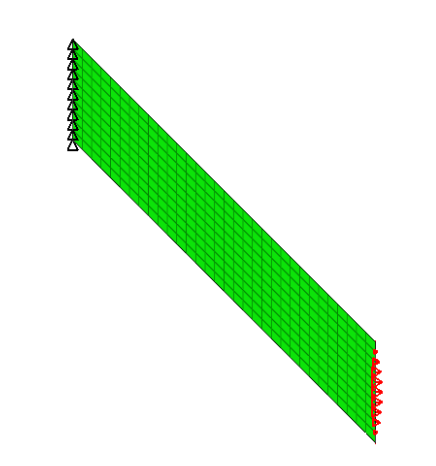

Load and Constraint:
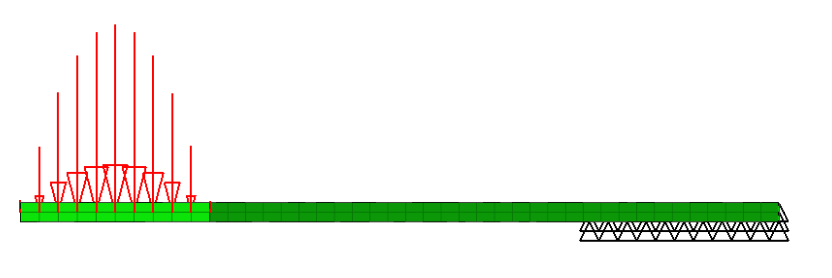

Laod value at nodes:
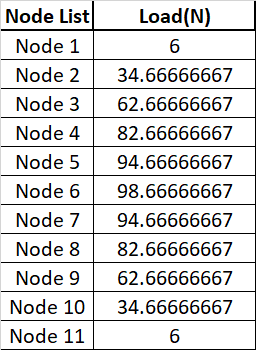

The load discretisation technique utilised is that of a linear load in FEM instead of a parabolic load.
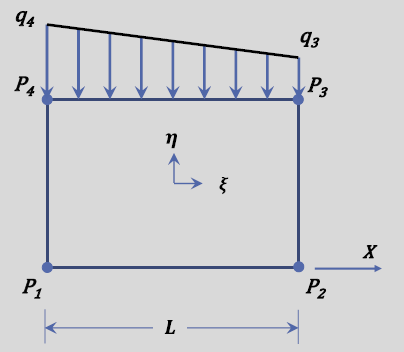

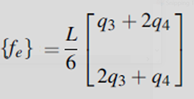

### <b>3. Analysis Results</b>###

First, we are displaying the deflection pattern that we observed.

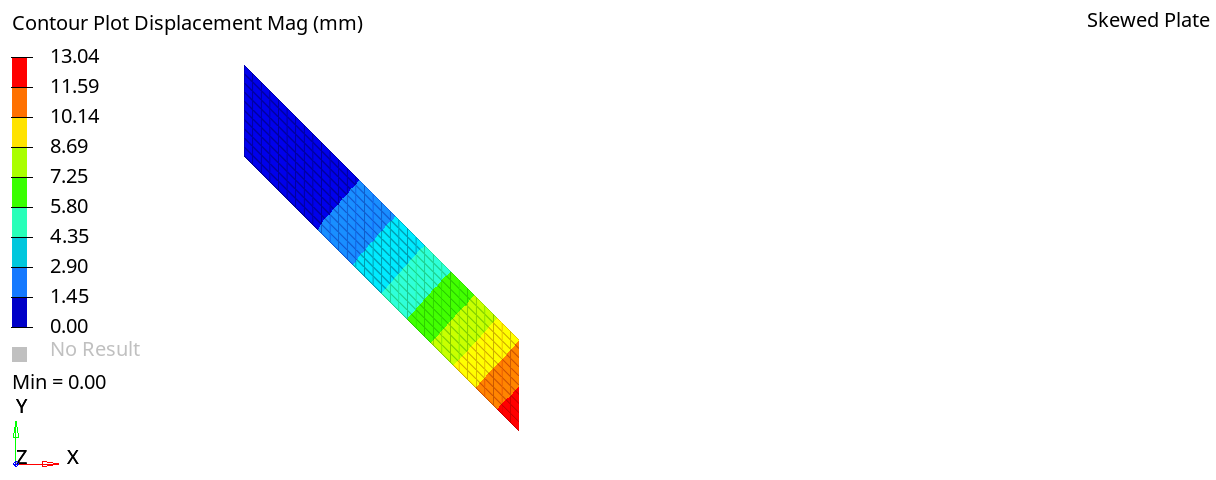

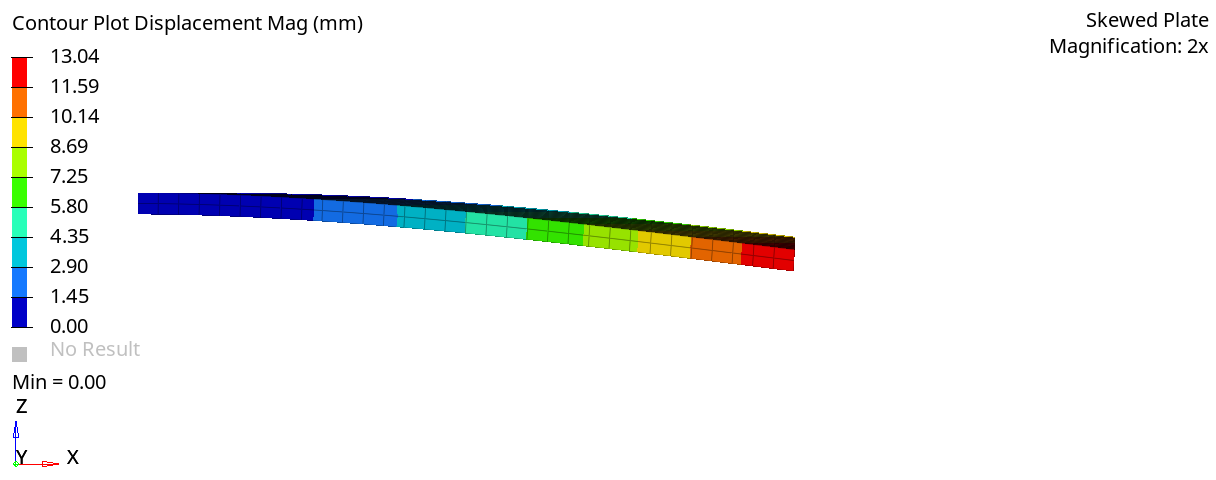

Nodal displacement at  $𝑦=0$  and  $𝑦=10𝑚𝑚$  to calculate the gradient.

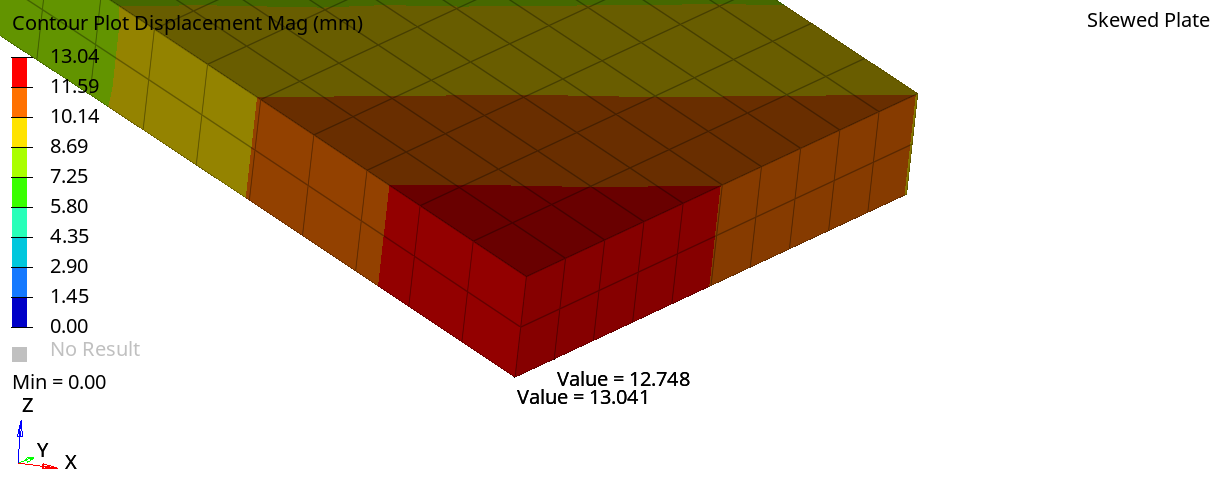

<br>Calculation of gradient:</br>
<br>Nodal displacement at Node 0 = 13.04mm</br>
<br>Nodal displacement at Node 1 = 12.74mm</br>

Hence, the rotation gradient at tip chord is, $Rotation = \frac{Node1 - Node0}{\delta L}$ 

In [22]:
display(Math(r'Rotation_{{Numerical}}= {}'.format(sp.latex(-0.03))))

<IPython.core.display.Math object>

### <b>4. Results and Discussion</b>###
The rotation gradient that we obtained through Analytical Method is $-0.0385$ and while that obtained through Numerical Method is $-0.03$.
<br>On comparison of the analytical result and simulation result, we find that the simulation result is around 21.05% less than that of the analytical results. Although the gradient sign is same which suggests that the Tip chord will deflect more at y=0 and lesser as we progress along the y axis.
<br>The difference in the two value could be attributed to the following reasons:</br>
<br>1. The discretisation scheme of body, i.e. Mesh size.</br>
<br>2. Application of linear discretization of load instead of parabolic.</br>
<br></br>
<br>Overall, we can say that analytical and numerical results are coherent and the objective has been achieved. </br>

### <b>5. References</b>###
<br>This problem was taken from Chapter 6 of the book, "Solid Mechanics, A Variational Approach" by Dym & Shames.
<br>We have also taken reference from the "Basic Finite Element Method as Applied to Injury Biomechanics" by King H. Yang for the discretisation of the load. </br> 

This is the first part of our term project, we were further motivated to extend it to analyse a Skewed Plate under pure bending.
We also included the analysis of a straight rectangular plate under pure bending. 
<br>Requesting you to please go through the 2nd report of our project where the second part has been discussed.</br>

<b>Contribution of Each Group Member</b>
<br><b>1.Saksham Kumar (20ME63R44)</b>: Coding, Report on "Rotation of a Skewed Plate with One End Fixed".
<br><b>2.Dewang Suresh Gandhi (20ME63R27)</b>: Coding, Report on "Rotation of a Skewed Plate with One End Fixed" 
<br><b>3.Shivanshu Zamdagni (20ME63S01)</b>: Simulation of the Problem in Hyperworks and presentation of comparative results of Analytical and Numerical methods.
<br><b>4.Hima Vamsi Krishna Anala(16ME33009)</b>: Coding, Report on "Plates Under Pure Bending" which discusses the case of rotation of straight and skewed plates under pure bending.